In [1]:
from IPython.display import Markdown
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
class Minesweeper:
    Rewards = 0
    N = 0
    K = 0
    arr_sam = [[0 for row in range(0)] for column in range(0)]
    arr = [[0 for row in range(0)] for column in range(0)]
    arr_reward_factor = [[0 for row in range(0)] for column in range(0)]
    Don = False
    action_space_size = 1
    state_space_size = 0
    def Create_minesweeper(n, k) :
        Minesweeper.Rewards = 0
        Minesweeper.N = n
        Minesweeper.K = k
        Minesweeper.arr_sam = [[0 for row in range(n)] for column in range(n)]
        Minesweeper.arr = [[0 for row in range(n)] for column in range(n)]
        Minesweeper.arr_reward_factor = [[0 for row in range(n)] for column in range(n)]
        Minesweeper.Done = False
        Minesweeper.action_space_size =  1
        Minesweeper.state_space_size = n * n * 100
        
        
        for i in range(n):
            for j in range(n):
                Minesweeper.arr_sam[i][j] = '-'            
        
        for num in range(k):
            WT = True
            while WT == True:
                
                r = random.randint(0,Minesweeper.N-1)
                c = random.randint(0,Minesweeper.N-1)
                
                if(Minesweeper.arr[r][c] != 'X'):
                    Minesweeper.arr[r][c] = 'X'
                    WT = False
        
        
        #Minesweeper.arr[0][1] = 'X'
        #Minesweeper.arr[4][2] = 'X'
        #Minesweeper.arr[2][0] = 'X'
        #Minesweeper.arr[3][4] = 'X'
        
        
        #print("------------------------------------------------------------")    

        #for row in Minesweeper.arr:
        #    print("\t".join(str(cell) for cell in row))
        #    print("")

        #print("------------------------------------------------------------")
        for c in range(n): 
            #print('c: ', c)
            for r in range(n):
                # Find_reward_factors
                Counter = 0  
                if (c == Minesweeper.N-1):
                    Counter = 5 # center right
                if (c == 0):
                    Counter = 5  # center left
                if (r == 0 ):
                    Counter = 5  # center top
                if (r == Minesweeper.N-1):
                    Counter = 5  # center bottom
                if (c == Minesweeper.N-1 and r == 0 ):
                    Counter = 3  # top right
                if (c == 0 and r == 0 ):
                    Counter = 3  # top left
                if (c == Minesweeper.N-1 and r == Minesweeper.N-1):
                    Counter = 3  # bottom right
                if (c == 0 and r == Minesweeper.N-1):
                    Counter = 3  # bottom left
                if (Counter == 0):
                    Counter = 8
                    
                Minesweeper.arr_reward_factor[r][c] = Counter

                #print('     r: ',r)
                if Minesweeper.arr[r][c] == 'X':
                    #print('          r:',r,'c:',c)
                    #print('\r\n')

                    if (c != Minesweeper.N-1 and Minesweeper.arr[r][c+1] != 'X'):
                        Minesweeper.arr[r][c+1] += 1 # center right
                    if (c != 0 and Minesweeper.arr[r][c-1] != 'X'):
                        Minesweeper.arr[r][c-1] += 1 # center left
                    if (r != 0 and Minesweeper.arr[r-1][c] != 'X'):
                        Minesweeper.arr[r-1][c] += 1 # center top
                    if (r != Minesweeper.N-1 and Minesweeper.arr[r+1][c] != 'X'):
                        Minesweeper.arr[r+1][c] += 1 # center bottom
                    if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr[r-1][c+1] != 'X'):
                        Minesweeper.arr[r-1][c+1] += 1 # top right
                    if (c != 0 and r != 0 and Minesweeper.arr[r-1][c-1] != 'X'):
                        Minesweeper.arr[r-1][c-1] += 1 # top left
                    if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c+1] != 'X'):
                        Minesweeper.arr[r+1][c+1] += 1 # bottom right
                    if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c-1] != 'X'):
                        Minesweeper.arr[r+1][c-1] += 1 # bottom left

                        
        #print("----------------------------------------------------------------------------------")
        #for row in Minesweeper.arr:
        #    print("\t".join(str(cell) for cell in row))
        #    print("")

        #print("----------------------------------------------------------------------------------")
        return Minesweeper.arr      

    
    
    def Clear_minesweeper(r, c):
        #print('r: ',r)
        #print('c: ',c)
        
        
        #if(Minesweeper.arr[r][c] == 0):
            #Minesweeper.Rewards += 1  # Add Reward 
            
        Minesweeper.arr_sam[r][c] = Minesweeper.arr[r][c]


        if (c != Minesweeper.N-1 and Minesweeper.arr[r][c+1] != 'X'  and Minesweeper.arr_sam[r][c+1] == '-'):
            Minesweeper.arr_sam[r][c+1] = Minesweeper.arr[r][c+1] # center right
            #Minesweeper.Rewards += Minesweeper.arr[r][c+1] # Add Reward 
            if( Minesweeper.arr[r][c+1] == 0 ):
                Minesweeper.Clear_minesweeper(r,c+1)

        if (c != 0 and Minesweeper.arr[r][c-1] != 'X' and Minesweeper.arr_sam[r][c-1] == '-'):
            Minesweeper.arr_sam[r][c-1] = Minesweeper.arr[r][c-1] # center left
            #Minesweeper.Rewards += Minesweeper.arr[r][c-1] # Add Reward 
            if( Minesweeper.arr[r][c-1] == 0 ):
                Minesweeper.Clear_minesweeper(r,c-1)

        if (r != 0 and Minesweeper.arr[r-1][c] != 'X' and Minesweeper.arr_sam[r-1][c] == '-'):
            Minesweeper.arr_sam[r-1][c] = Minesweeper.arr[r-1][c] # center top
            #Minesweeper.Rewards += Minesweeper.arr[r-1][c] # Add Reward 
            if( Minesweeper.arr[r-1][c] == 0 ):
                Minesweeper.Clear_minesweeper(r-1,c)

        if (r != Minesweeper.N-1 and Minesweeper.arr[r+1][c] != 'X' and Minesweeper.arr_sam[r+1][c] == '-'):
            Minesweeper.arr_sam[r+1][c] = Minesweeper.arr[r+1][c] # center bottom
            #Minesweeper.Rewards += Minesweeper.arr[r+1][c] # Add Reward 
            if( Minesweeper.arr[r+1][c] == 0 ):
                Minesweeper.Clear_minesweeper(r+1,c)

        if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr[r-1][c+1] != 'X' and Minesweeper.arr_sam[r-1][c+1] == '-'):
            Minesweeper.arr_sam[r-1][c+1] = Minesweeper.arr[r-1][c+1] # top right
            #Minesweeper.Rewards += Minesweeper.arr[r-1][c+1] # Add Reward 
            if( Minesweeper.arr[r-1][c+1] == 0 ):
                Minesweeper.Clear_minesweeper(r-1,c+1)

        if (c != 0 and r != 0 and Minesweeper.arr[r-1][c-1] != 'X' and Minesweeper.arr_sam[r-1][c-1] == '-'):
            Minesweeper.arr_sam[r-1][c-1] = Minesweeper.arr[r-1][c-1] # top left
            #Minesweeper.Rewards += Minesweeper.arr[r-1][c-1] # Add Reward 
            if( Minesweeper.arr[r-1][c-1] == 0 ):
                Minesweeper.Clear_minesweeper(r-1,c-1)

        if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c+1] != 'X' and Minesweeper.arr_sam[r+1][c+1] == '-'):
            Minesweeper.arr_sam[r+1][c+1] = Minesweeper.arr[r+1][c+1] # bottom right
            #Minesweeper.Rewards += Minesweeper.arr[r+1][c+1] # Add Reward 
            if( Minesweeper.arr[r+1][c+1] == 0 ):
                Minesweeper.Clear_minesweeper(r+1,c+1)

        if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c-1] != 'X' and Minesweeper.arr_sam[r+1][c-1] == '-'):
            Minesweeper.arr_sam[r+1][c-1] = Minesweeper.arr[r+1][c-1] # bottom left
            #Minesweeper.Rewards += Minesweeper.arr[r+1][c-1] # Add Reward 
            if( Minesweeper.arr[r+1][c-1] == 0 ):
                Minesweeper.Clear_minesweeper(r+1,c-1)

                   
                
    def Check_win(n,k):
        win_count = n * n - k
        count = 0
        for i in range(n):
            for j in range(n):
                if(Minesweeper.arr_sam[i][j] != '-'):
                    count += 1
        if(count == win_count):
            #print('==================================================')
            #print('==================================================')
            #print('==================================================')
            #print('you Wiiiiiiiiiiiiiiiiiiiiiiiiiin!!!!')
            #print('==================================================')
            #print('==================================================')
            #print('==================================================')
            return 1

        else:
            return 0


        
    def run_Game():
        while Minesweeper.Done == False:
            
            if(Minesweeper.Done == True):
                Minesweeper.Show_Me()
                print('Game Is Done')
            
            print("Enter your cell you want to open :")
            c = input('X (1 to 5) :')
            r = input('Y (1 to 5) :')
            clear_output()
            if(c == '' or r == ''):
                break
            c = int(c) - 1 # 0 based indexing
            r = int(r) - 1 # 0 based indexing
            
            if(Minesweeper.arr_sam[r][c] != '-'):
                return

            if(Minesweeper.arr[r][c] == 'X'):
                print('Game Over')
                Minesweeper.Done = True
                break
            else:
                if(Minesweeper.arr[r][c] != 0):
                    Minesweeper.arr_sam[r][c] = Minesweeper.arr[r][c]
                else:
                    Minesweeper.Clear_minesweeper(r,c)

            state = Minesweeper.Check_win(Minesweeper.N,Minesweeper.K)   
            if(state == 1):
                #clear_output()
                print('"You win!"')
                break

            for row in Minesweeper.arr_sam:
                print("\t".join(str(cell) for cell in row))
                print("")
                
         
        
        
    def run_Steps_Game(Num):
        Re = 0
        r,c = Minesweeper.Convert_StepNumber_To_Address(Num)
        
        Minesweeper.Rewards = 0
        if(Minesweeper.Done == True):
            return 
        Re = Minesweeper.find_rewards(Num)
        if(Minesweeper.arr[r][c] == 'X'):
            #print('Game Over')
            Minesweeper.Done = True
            Re = -1
        else:
            if(Minesweeper.arr[r][c] != 0):
                Minesweeper.arr_sam[r][c] = Minesweeper.arr[r][c]
            else:
                Minesweeper.Clear_minesweeper(r,c)
        Minesweeper.Rewards = Re    
        
        state = Minesweeper.Check_win(Minesweeper.N,Minesweeper.K) 
        if(state == 1):
            Minesweeper.Done = True

            
         
        
        
 
    def find_rewards(num):
        Counter = 0
        Free_box = 0
        r,c = Minesweeper.Convert_StepNumber_To_Address(num)
        
        if (c != Minesweeper.N-1 and Minesweeper.arr_sam[r][c+1] != '-'):
            Counter += Minesweeper.arr_sam[r][c+1] # center right
            Free_box += 1

        if (c != 0 and Minesweeper.arr_sam[r][c-1] != '-'):
            Counter += Minesweeper.arr_sam[r][c-1] # center left
            Free_box += 1

        if (r != 0 and Minesweeper.arr_sam[r-1][c] != '-'):
            Counter += Minesweeper.arr_sam[r-1][c] # center top
            Free_box += 1

        if (r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c] != '-'):
            Counter += Minesweeper.arr_sam[r+1][c] # center bottom
            Free_box += 1

        if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr_sam[r-1][c+1] != '-'):
            Counter += Minesweeper.arr_sam[r-1][c+1] # top right
            Free_box += 1

        if (c != 0 and r != 0 and Minesweeper.arr_sam[r-1][c-1] != '-'):
            Counter += Minesweeper.arr_sam[r-1][c-1] # top left
            Free_box += 1

        if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c+1] != '-'):
            Counter += Minesweeper.arr_sam[r+1][c+1] # bottom right
            Free_box += 1

        if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c-1] != '-'):
            Counter += Minesweeper.arr_sam[r+1][c-1] # bottom left
            Free_box += 1
        if Counter == 0 and Free_box == 0:
            return 0
                    
        prob = Minesweeper.find_probabelity(num)
        return (10 - prob) / 10

    
        
    def Show_Me():
        for row in Minesweeper.arr_sam:
            print("\t".join(str(cell) for cell in row))
            print("")
            
            
    
    
    def Show_Me_Colored(num):
        word = ''
        counter = 0
        for i in range(Minesweeper.N):
            for j in range(Minesweeper.N):
                if counter == num:
                    t = str(Minesweeper.arr[i][j])
                    word = word + '<span style="margin-left:3em">'+ '<span style="color: #ff0000">'+ t + '</span>'
                else:
                    word = word + '<span style="margin-left:3em">' +  str(Minesweeper.arr_sam[i][j]) + '</span>'
                    #print('dd')
                counter += 1
            display(Markdown(word))
            word = ''
            
            
            
    def Show_Me_Colored_All():
            word = ''
            counter = 0
            for i in range(Minesweeper.N):
                for j in range(Minesweeper.N):
                        word = word + '<span style="margin-left:3em">' +  str(Minesweeper.arr[i][j]) + '</span>'
                        #print('dd')
                display(Markdown(word))
                word = ''

      
    
    
    def Show_Map():
        for row in Minesweeper.arr:
            print("\t".join(str(cell) for cell in row))
            print("") 
            
            
            
    def reset():
        Minesweeper.Rewards = 0
        Minesweeper.Done = False
        for i in range(n):
            for j in range(n):
                Minesweeper.arr_sam[i][j] = '-'
                
    
    
    def Convert_StepNumber_To_Address(num):     
        r = 0
        c = 0
        if num > Minesweeper.N * Minesweeper.N - 1:
            return r,c
        for i in range(Minesweeper.N * Minesweeper.N):
            if(i == num):
                break
            if(c < Minesweeper.N-1):
                c += 1
            else:
                r += 1
                c = 0   
        return r,c
    
    
    
    
    
    def Convert_Address_To_StepNumber(r,c):     
        Num = (r * Minesweeper.N) + c
        return Num

    
    
    
    
    def action_space_sample(num):  
        
        if num == -1:    
            return np.random.randint(Minesweeper.N * Minesweeper.N * 100)
        else: 
            sample_space = Minesweeper.Edge_Finder()
            #print(sample_space)
            num = np.random.randint(len(sample_space))
            return(sample_space[num])
            
        
        
        
        
        
    def Count_To_Win():
        counter = 0
        for i in range(Minesweeper.N):
            for j in range(Minesweeper.N):
                if(Minesweeper.arr_sam[i][j] == '-'):
                    counter += 1        
        counter = counter - Minesweeper.K  
        return counter
    
    
    
    
    
    def Reward_factor_Finder(num):
        r,c = Minesweeper.Convert_StepNumber_To_Address(num)
        return Minesweeper.arr_reward_factor[r][c]
    
    
    
    
    
    
    def Edge_Finder():
        list = []
        Free_box = 0
        num_count = 0
        for num in range((Minesweeper.N * Minesweeper.N) ):
            #print(num)
            Free_box = 0
            num_count = 0
            r,c = Minesweeper.Convert_StepNumber_To_Address(num)
            if Minesweeper.arr_sam[r][c] == '-' :
                
                if (c != Minesweeper.N-1 and Minesweeper.arr_sam[r][c+1] != '-'):
                    Free_box += 1 # center right
                    num_count += Minesweeper.arr_sam[r][c+1]

                if (c != 0 and Minesweeper.arr_sam[r][c-1] != '-'):
                    Free_box += 1 # center left
                    num_count += Minesweeper.arr_sam[r][c-1]

                if (r != 0 and Minesweeper.arr_sam[r-1][c] != '-'):
                    Free_box += 1 # center top
                    num_count += Minesweeper.arr_sam[r-1][c]

                if (r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c] != '-'):
                    Free_box += 1  # center bottom
                    num_count += Minesweeper.arr_sam[r+1][c]

                if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr_sam[r-1][c+1] != '-'):
                    Free_box += 1 # top right
                    num_count += Minesweeper.arr_sam[r-1][c+1]

                if (c != 0 and r != 0 and Minesweeper.arr_sam[r-1][c-1] != '-'):
                    Free_box += 1 # top left
                    num_count += Minesweeper.arr_sam[r-1][c-1]

                if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c+1] != '-'):
                    Free_box += 1 # bottom right
                    num_count += Minesweeper.arr_sam[r+1][c+1]

                if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c-1] != '-'):
                    Free_box += 1 # bottom left
                    num_count += Minesweeper.arr_sam[r+1][c-1]
                
                prob = Minesweeper.find_rewards(num)
                Numprob = int(prob * 100)
                
                #print('free',Free_box)
                if Free_box != 0:
                    list.append(num * 100 + Numprob)
        return list

    
    
    
    def find_probabelity(num):
        r,c = Minesweeper.Convert_StepNumber_To_Address(num)
        prob = 0
        if Minesweeper.arr_sam[r][c] == '-' :
            if (c != Minesweeper.N-1 and Minesweeper.arr_sam[r][c+1] != '-'):
                # center right
                num_T = Minesweeper.Convert_Address_To_StepNumber(r,c+1)
                prob += Minesweeper.find_probabelity_around(num_T)               
            if (c != 0 and Minesweeper.arr_sam[r][c-1] != '-'):
                # center left
                num_T = Minesweeper.Convert_Address_To_StepNumber(r,c-1)
                prob += Minesweeper.find_probabelity_around(num_T)
            if (r != 0 and Minesweeper.arr_sam[r-1][c] != '-'):
                # center top
                num_T = Minesweeper.Convert_Address_To_StepNumber(r-1,c)
                prob += Minesweeper.find_probabelity_around(num_T)
            if (r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c] != '-'):
                # center bottom
                num_T = Minesweeper.Convert_Address_To_StepNumber(r+1,c)
                prob += Minesweeper.find_probabelity_around(num_T)
            if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr_sam[r-1][c+1] != '-'):
                # top right
                num_T = Minesweeper.Convert_Address_To_StepNumber(r-1,c+1)
                prob += Minesweeper.find_probabelity_around(num_T)
            if (c != 0 and r != 0 and Minesweeper.arr_sam[r-1][c-1] != '-'):
                # top left
                num_T = Minesweeper.Convert_Address_To_StepNumber(r-1,c-1)
                prob += Minesweeper.find_probabelity_around(num_T)   
            if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c+1] != '-'):
                # bottom right
                num_T = Minesweeper.Convert_Address_To_StepNumber(r+1,c+1)
                prob += Minesweeper.find_probabelity_around(num_T)
            if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c-1] != '-'):
                # bottom left
                num_T = Minesweeper.Convert_Address_To_StepNumber(r+1,c-1)
                prob += Minesweeper.find_probabelity_around(num_T)
            if prob >= 10:
                prob = 10
        return prob
    
    
    def find_probabelity_around(num):
        prob = 0
        box = 0
        r,c = Minesweeper.Convert_StepNumber_To_Address(num)
        if Minesweeper.arr_sam[r][c] == 0:
            return 0
        if Minesweeper.arr_sam[r][c] != '-' :
            if (c != Minesweeper.N-1 and Minesweeper.arr_sam[r][c+1] == '-'):
                box += 1 # center right
                
            if (c != 0 and Minesweeper.arr_sam[r][c-1] == '-'):
                box += 1 # center left

            if (r != 0 and Minesweeper.arr_sam[r-1][c] == '-'):
                box += 1 # center top

            if (r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c] == '-'):
                box += 1  # center bottom

            if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr_sam[r-1][c+1] == '-'):
                box += 1 # top right

            if (c != 0 and r != 0 and Minesweeper.arr_sam[r-1][c-1] == '-'):
                box += 1 # top left

            if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c+1] == '-'):
                box += 1 # bottom right

            if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr_sam[r+1][c-1] == '-'):
                box += 1 # bottom left
            
            probability = Minesweeper.arr_sam[r][c] / box
            
            if Minesweeper.arr_sam[r][c] == box:
                probability = 10
            
            return probability

In [3]:
M = Minesweeper
My_N = 5
My_K = 4
arr = M.Create_minesweeper(My_N,My_K)
M.Show_Map()

1	1	0	0	0

X	1	1	1	1

1	1	1	X	1

1	1	2	2	2

1	X	1	1	X



In [4]:
M.run_Steps_Game(20)
M.Show_Me()

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-

1	-	-	-	-



In [5]:
M.Edge_Finder()

[1596, 1696, 2196]

In [6]:
#print(M.find_probabelity(3))
M.find_probabelity(17)

0

In [7]:
Reward_Table = [[0 for row in range(My_N)] for column in range(My_N)]
counter = 0
edge = M.Edge_Finder()

for i in range(len(edge)):
    D = (edge[i]/100)
    edge[i] = int(D)
#print(edge)

for i in range(My_N):
    for j in range(My_N):
        if counter in edge:
            Reward_Table[i][j] = M.find_probabelity(counter)  # M.find_probabelity(counter)
        else :
            Reward_Table[i][j] = '-'
        counter += 1
        
Reward_Table

[['-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-'],
 [0.3333333333333333, 0.3333333333333333, '-', '-', '-'],
 ['-', 0.3333333333333333, '-', '-', '-']]

In [8]:
Reward_Table = [[0 for row in range(My_N)] for column in range(My_N)]
counter = 0
edge = M.Edge_Finder()
for i in range(len(edge)):
    D = (edge[i]/100)
    edge[i] = int(D)
#print(edge)

for i in range(My_N):
    for j in range(My_N):
        if counter in edge:
            Reward_Table[i][j] = M.find_rewards(counter)  # M.find_probabelity(counter)
        else :
            Reward_Table[i][j] = '-'
        counter += 1
        
Reward_Table

[['-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-'],
 [0.9666666666666666, 0.9666666666666666, '-', '-', '-'],
 ['-', 0.9666666666666666, '-', '-', '-']]

In [9]:
#M.run_Steps_Game(0)
#M.run_Steps_Game(4)
#M.run_Steps_Game(20)
#M.run_Steps_Game(5)
#M.run_Steps_Game(24)
#M.run_Steps_Game(23)
#M.action_space_sample()
#print('Reward : ',M.Rewards)
M.Show_Me()

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-

1	-	-	-	-



In [18]:
def Clear_Q_Table(q_table):
    q_table_Temp = np.copy(q_table)
    counter = 0
    active_boxes = M.Edge_Finder()
    #print(active_boxes)
    sample_space = []
    for i in range(M.N * M.N * 100):
        if i in active_boxes:
            i = i
            #print(q_table_Temp[0][i])
        else:
            sample_space.append(i)
    
    for i in range(M.N * M.N):
        R = M.find_rewards(i)
        if R == 0:
            for j in range(100):
                C = i * 100 + j
                sample_space.append(C)
            
            
    for i in range(len(sample_space)):
        q_table_Temp[0][sample_space[i]] = 0
        #print(sample_space[i])
    #print(active_boxes)       
    return q_table_Temp



In [19]:
#num_episodes = 10000   # تعداد بار هاییست که ایجنت بازی را انجام میدهد
#max_steps_per_episode = 100  # تعداد اکشن ها یا حرکاتی است که ایجنت در هر بازی میتواند انجام دهد و اگر بعد از 100 در اینجا به هدف نرسد بازی را از اول شروع میکند و پویینت 0 میدهد

In [20]:
num_episodes = 10000   
max_steps_per_episode = 100  

learning_rate = 0.1   
discount_rate = 0.99   

exploration_rate = 1 
max_exploration_rate = 1
min_exploration_rate = 0.1
exploration_decay_rate = 0.01

rewards_all_episodes = []

In [21]:
action_space_size = M.action_space_size
state_space_size = M.state_space_size
q_table = np.zeros((action_space_size,state_space_size))
#print(q_table)
q_table.shape

(1, 2500)

In [22]:
# Q-Learning algorithm
win_Counter, random_counter, first_acction_counter, Q_counter, CW = 0,0,0,0,0
win_list = []
for episode in range(num_episodes):
    arr = M.Create_minesweeper(My_N,My_K)
    clear_output(wait=True)
    print(episode)
    rewards_current_episode , state = 0,0
    done = False
    first_action = M.action_space_sample(-1)
    first_action = int(first_action / 100)
    for step in range(max_steps_per_episode):
        q_table_Templet = np.copy(q_table)
        q_table_Templet = Clear_Q_Table(q_table_Templet)
        if first_action != -1:
            action = first_action
            first_acction_counter += 1
        else:
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action_Num = np.argmax(q_table_Templet[state,: ])
                action = int(action_Num / 100)
                Q_counter += 1
            else:
                random_counter += 1
                action = M.action_space_sample(0)
                action_Num = action
                action = int(action_Num / 100)        
        M.run_Steps_Game(action)
        reward = Minesweeper.Rewards
        done = M.Done       
        # Update Q-table for Q(s,a)
        if first_action == -1:
            q_table[state, action_Num] = q_table[state, action_Num] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[state, :]))
        else:
            first_action = -1        
        rewards_current_episode += reward 
        if done == True :
            CW = M.Check_win(My_N,My_K)
            break 
    win_list.append(CW)
    if CW == 1:
        win_Counter+=1
    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    print(win_Counter)


9999
2826


In [23]:
print('decision based on Q-table : ' , Q_counter)
print('decision randomly : ', random_counter)

decision based on Q-table :  30972
decision randomly :  3713


In [26]:
# Calculate and print the average win per thousand episodes
episod = []
win = []
win_per_thosand_episodes = np.split(np.array(win_list), num_episodes/1000)
#print(rewards_per_thosand_episodes)
count = 1000
win_counter = 0
for r in win_per_thosand_episodes:
    for i in range(len(r)):
        if r[i] == 1:
            win_counter += 1
    #print(count, ':', win_counter)
    count += 1000
    episod.append(count)
    win.append(win_counter)
    win_counter = 0

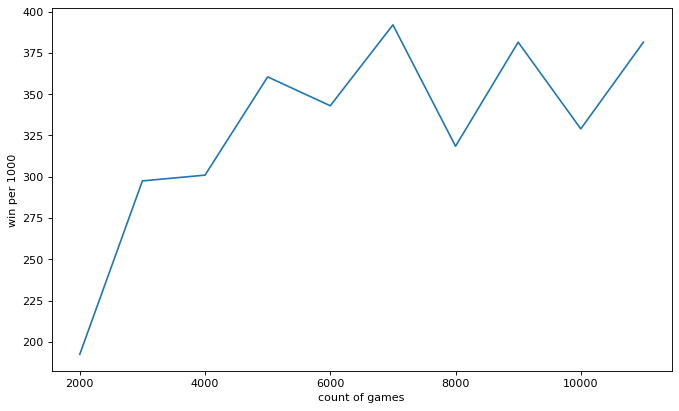

In [27]:
x = episod
y = win 
plt.figure(figsize=(10,6),dpi=80)
plt.plot(x, y)  # Plot the chart
plt.xlabel('count of games')
plt.ylabel('win per 1000')
plt.show()  # display

In [134]:
# Calculate and print the average reward per thousand episodes

rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ':', str(sum(r/1000)))
    count += 1000
# Print updated Q-table
#print("\n\n********Q-table********\n")
#print(q_table)

********Average reward per thousand episodes********

1000 : 1.8862470238095435
2000 : 1.9259892857143066
3000 : 2.096120238095259
4000 : 1.8416573809524004
5000 : 1.5733158333333495
6000 : 1.6762295238095393
7000 : 1.5797296428571619
8000 : 1.6439722619047783
9000 : 1.6694669047619282
10000 : 1.3722036904762092


In [28]:
counter = 0
for i in range(len(q_table[0])):
    #print( 'i : ', i , 'QT : ', q_table[0][i])
    if q_table[0][i] == 0:
        counter += 1
print( 'free count : ', counter )

free count :  1941


In [30]:
# Q-Learning run
win_Counter = 0
win_list = []
CW = 0
random_counter = 0
for episode in range(10000):
    arr = M.Create_minesweeper(My_N,My_K)
    clear_output(wait=True)
    print(episode)
    state = 0
    done = False
    rewards_current_episode = 0
    first_action = M.action_space_sample(-1)
    first_action = int(first_action / 100)
    for step in range(200):
        q_table_Templet = np.copy(q_table)
        q_table_Templet = Clear_Q_Table(q_table_Templet)
        if first_action != -1:
            action = first_action
            first_action = -1
        else:
            action_Num = np.argmax(q_table_Templet[state,: ])
            action = int(action_Num / 100)
            Q_counter += 1
        
        M.run_Steps_Game(action)
        
        done = M.Done        
        if done == True :
            CW = M.Check_win(My_N,My_K)
            break      
    win_list.append(CW)
    if CW == 1:
        win_Counter+=1
    # Exploration rate decay
    print(win_Counter)


9999
4101


In [157]:
# Calculate and print the average win per thousand episodes
episod = []
win = []
win_per_thosand_episodes = np.split(np.array(win_list), 10000/1000)
#print(rewards_per_thosand_episodes)
count = 1000
win_counter = 0
for r in win_per_thosand_episodes:
    for i in range(len(r)):
        if r[i] == 1:
            win_counter += 1*2.5
    #print(count, ':', win_counter)
    count += 1000
    episod.append(count)
    win.append(win_counter)
    win_counter = 0


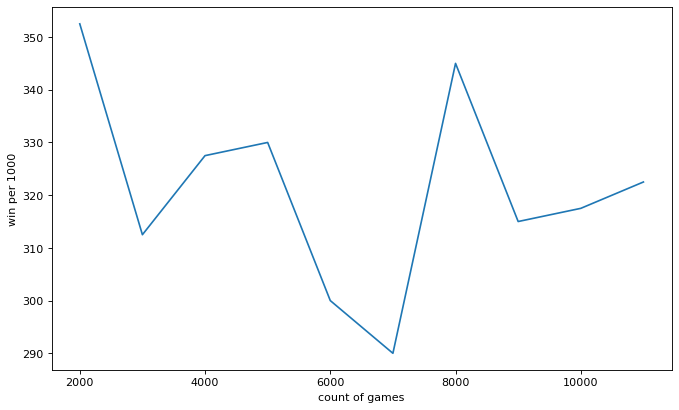

In [158]:
x = episod
y = win 
plt.figure(figsize=(10,6),dpi=80)
plt.plot(x, y)  # Plot the chart
plt.xlabel('count of games')
plt.ylabel('win per 1000')
plt.show()  # display

In [43]:
for episode in range(5):
    clear_output(wait=True)
    #M.reset()
    arr = M.Create_minesweeper(My_N,My_K)
    
    state = 0 # M.action_space_sample(-1)
    #print(state)
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5)

    q_table_Templet = np.copy(q_table)
    #print(q_table)
    #time.sleep(5)
    

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        time.sleep(0.5)
        
        action = np.argmax(q_table_Templet[state,:])
        action = int(action / 100)
        M.run_Steps_Game(action)
        reward = Minesweeper.Rewards
        new_state = 0 # M.action_space_sample(action)
        done = M.Done
        clear_output(wait=True)
        a = M.Show_Me_Colored(action)
        print('acion : ' , action)

        print('Count To End : ', M.Count_To_Win())
        q_table_Templet = np.copy(q_table)
        q_table_Templet = Clear_Q_Table(q_table)
        
        print(q_table_Templet)
        #print(new_state)
        if done :
            time.sleep(5)
            clear_output(wait=True)
            #M.reset()
            if M.Check_win(M.N,M.K) == 1:
                M.Show_Me_Colored_All()
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print ("****You lass!****")
                #M.Show_Me_Colored_All()
                time.sleep(3)
            break
        state = new_state


****You lass!****
